### Image Quantization

Normal RGB image representation (with 8 bit depth per channel) yields more than 16 millions combinations (different colours). Is that many really necessary? Let's have a look.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

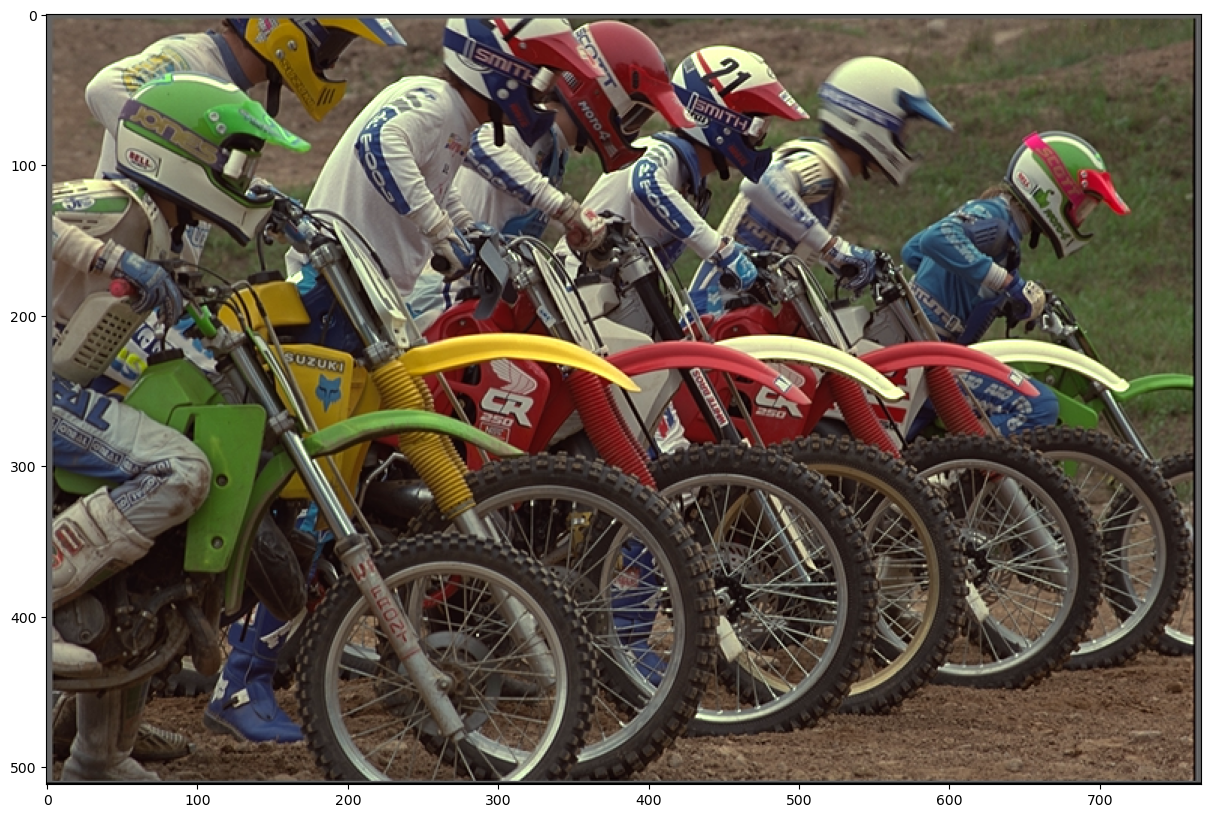

In [2]:
img = cv2.imread('data/kodim05.png') # kodim02
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Let us now count the different colours in the picture.

In [3]:
from tqdm import tqdm

rows, cols, channels = img.shape
colors = []

for r in tqdm(range(rows)):
    for c in range(cols):
        pixel = list(img[r, c, :])
        if pixel not in colors:
            colors.append(pixel)
            
print(rows*cols, len(colors))

100%|██████████| 512/512 [02:27<00:00,  3.47it/s]

393216 63558


In [4]:
print(rows*cols, len(colors))

393216 63558


In [5]:
# Let's count the different colours in a celever way :-)
pixels = np.reshape(img, (-1, 3))
pixels = [tuple(p) for p in pixels]
print('Number of pixels', rows*cols, len(pixels))

Number of pixels 393216 393216


In [6]:
from collections import Counter
colors = Counter(pixels)
colors

Counter({(99, 99, 99): 2968,
         (100, 98, 99): 18,
         (100, 99, 96): 478,
         (102, 98, 96): 55,
         (99, 98, 101): 18,
         (99, 98, 103): 12,
         (97, 99, 103): 15,
         (100, 98, 101): 8,
         (102, 97, 101): 6,
         (100, 97, 103): 4,
         (99, 97, 105): 7,
         (102, 99, 90): 25,
         (104, 100, 81): 10,
         (106, 99, 79): 13,
         (106, 100, 76): 13,
         (106, 99, 81): 35,
         (102, 99, 88): 14,
         (100, 99, 94): 49,
         (99, 99, 96): 85,
         (102, 97, 99): 11,
         (106, 95, 99): 3,
         (102, 98, 92): 135,
         (104, 98, 88): 31,
         (104, 99, 83): 10,
         (104, 99, 85): 17,
         (102, 98, 94): 110,
         (104, 98, 90): 50,
         (97, 99, 105): 21,
         (97, 100, 99): 10,
         (99, 100, 94): 64,
         (99, 100, 92): 25,
         (100, 100, 92): 52,
         (104, 97, 96): 20,
         (108, 95, 96): 9,
         (110, 95, 94): 11,
         (111, 94

In [7]:
print('Number of pixels', rows*cols)
print('Number of colors', len(colors))
print('Ratio of colors ', len(colors)/2**24)

Number of pixels 393216
Number of colors 63558
Ratio of colors  0.0037883520126342773


### Uniform Quantization

Instead of using 255 (8 bits) different levels for **each** of the colour channels, let's use a coarser resolution, e.g., [0, 4, 8, 12, ...]

Quantized image is 32 times smaller.
Original color pallette: 16777216
Using color pallette:    1048576


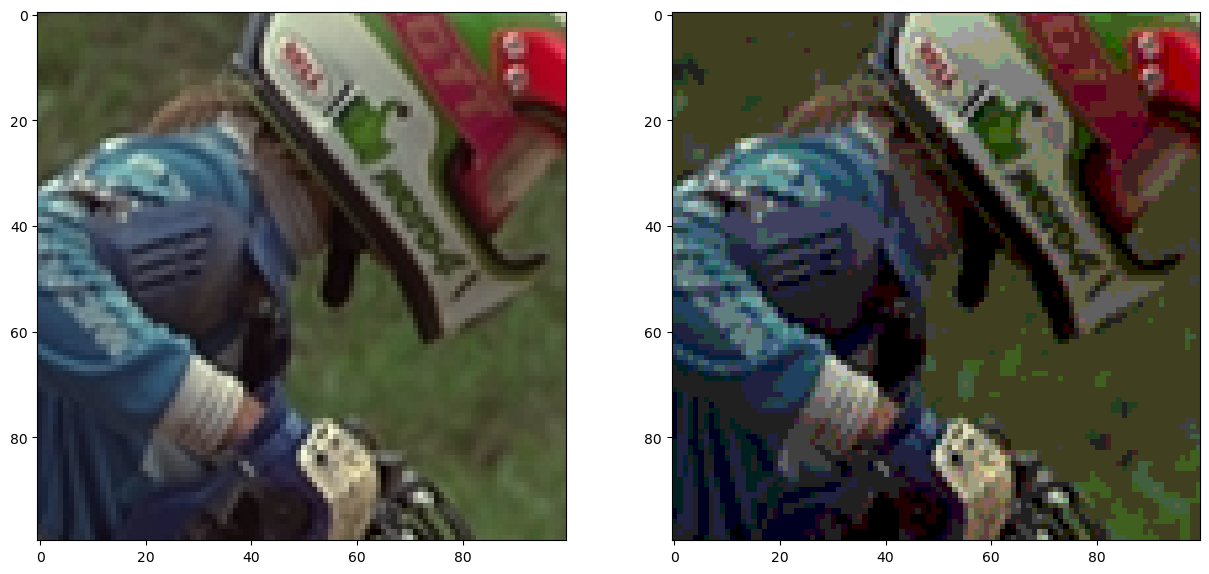

In [15]:
quantized = np.copy(img)
step = 32

# Since we know for loops are slow in python, let's make use of numy power :-)
quantized = (np.floor(quantized/step)*step).astype(np.uint8)

plt.subplot(121), plt.imshow(img[100:200, 600:700])
plt.subplot(122), plt.imshow(quantized[100:200, 600:700])

print('Quantized image is', step, 'times smaller.')
print('Original color pallette:', 2**24)
print('Using color pallette:   ', (2**24)//16)

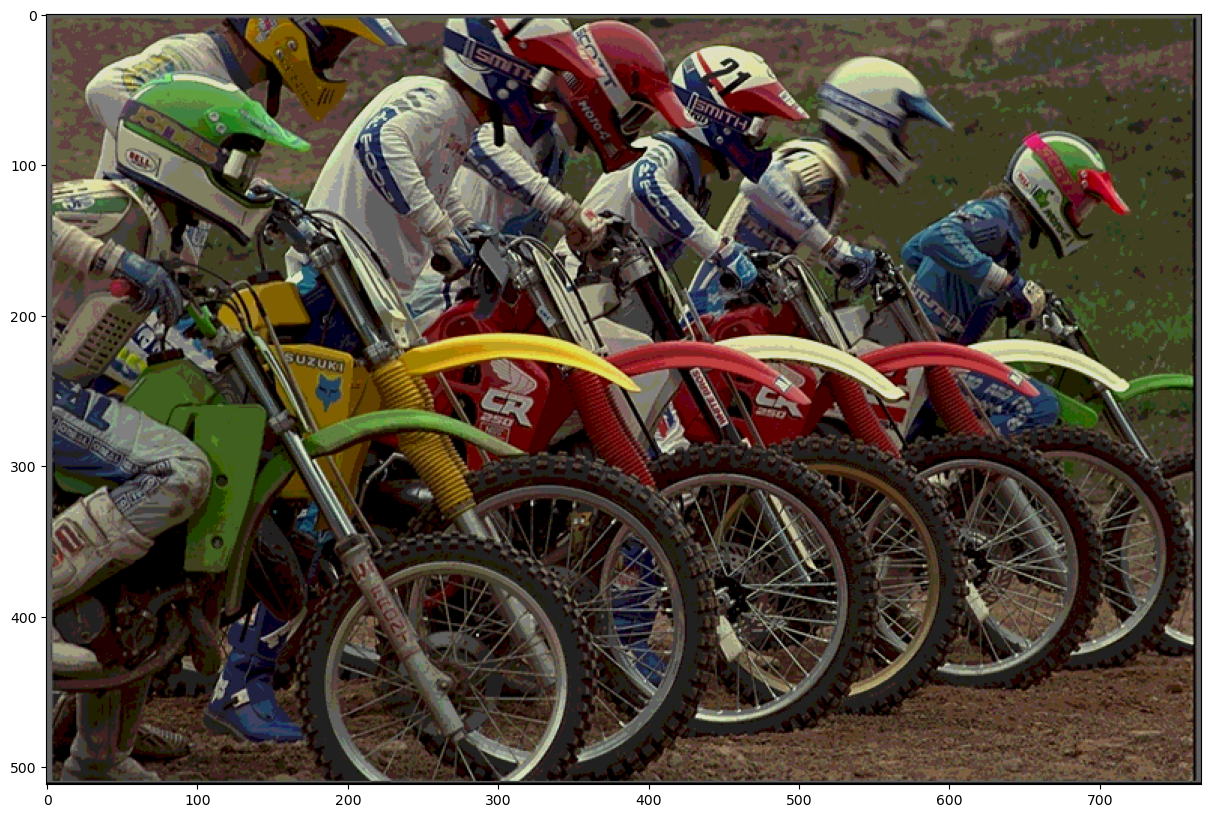

In [16]:
plt.imshow(quantized)